In [3]:
# ==========================================
# Exploratory Data Analysis (EDA)
# Greenhouse Temperature & Humidity Dataset
# ==========================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Improve plot readability for large datasets
plt.rcParams["figure.figsize"] = (10, 5)
sns.set_style("whitegrid")

In [4]:
# Load dataset
df = pd.read_csv("greenhouse_data.csv")

# Combine Date and Time into a single datetime column
df["Datetime"] = pd.to_datetime(df["Date"] + " " + df["Time"], errors="coerce")

# Basic structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38277 entries, 0 to 38276
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                38277 non-null  object        
 1   Time                38277 non-null  object        
 2   Temperature Front   38277 non-null  int64         
 3   Humidity Front      38277 non-null  int64         
 4   Temperature Middle  38277 non-null  int64         
 5   Humidity Middle     38277 non-null  int64         
 6   Temperature Back    38277 non-null  int64         
 7   Humidity Back       38277 non-null  int64         
 8   Fan/Wet Wall State  38277 non-null  object        
 9   Datetime            38277 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(6), object(3)
memory usage: 2.9+ MB


In [5]:
# Preview data
df.head()

,Date,Time,Temperature Front,Humidity Front,Temperature Middle,Humidity Middle,Temperature Back,Humidity Back,Fan/Wet Wall State,Datetime
0,2001/01/23,00:00:04,21,98,19,90,18,98,F,2001-01-23 00:00:04
1,2001/01/23,00:05:03,21,98,19,90,18,98,F,2001-01-23 00:05:03
2,2001/01/23,00:10:05,21,98,19,90,18,98,F,2001-01-23 00:10:05
3,2001/01/23,00:15:07,21,98,19,90,18,98,F,2001-01-23 00:15:07
4,2001/01/23,00:20:07,21,98,19,90,17,98,F,2001-01-23 00:20:07


In [6]:
print(f"Total records: {len(df)}")
print(f"Date range: {df['Datetime'].min()} to {df['Datetime'].max()}")

Total records: 38277
Date range: 2001-01-23 00:00:04 to 2025-05-23 23:56:08


In [20]:
df.describe()[[
    "Temperature Front", "Temperature Middle", "Temperature Back",
    "Humidity Front", "Humidity Middle", "Humidity Back"
]].round(2)

,Temperature Front,Temperature Middle,Temperature Back,Humidity Front,Humidity Middle,Humidity Back
count,38277.00,38277.00,38277.00,38277.00,38277.00,38277.00
mean,22.23,21.45,21.23,75.85,72.65,79.67
std,6.44,6.84,5.89,27.51,23.55,22.12
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,18.00,16.00,17.00,52.00,52.00,59.00
50%,21.00,20.00,21.00,91.00,80.00,93.00
75%,26.00,26.00,25.00,98.00,94.00,99.00
max,50.00,50.00,48.00,100.00,100.00,100.00


In [8]:
df["Temp_Avg"] = df[
    ["Temperature Front", "Temperature Middle", "Temperature Back"]
].mean(axis=1)

df["Hum_Avg"] = df[
    ["Humidity Front", "Humidity Middle", "Humidity Back"]
].mean(axis=1)

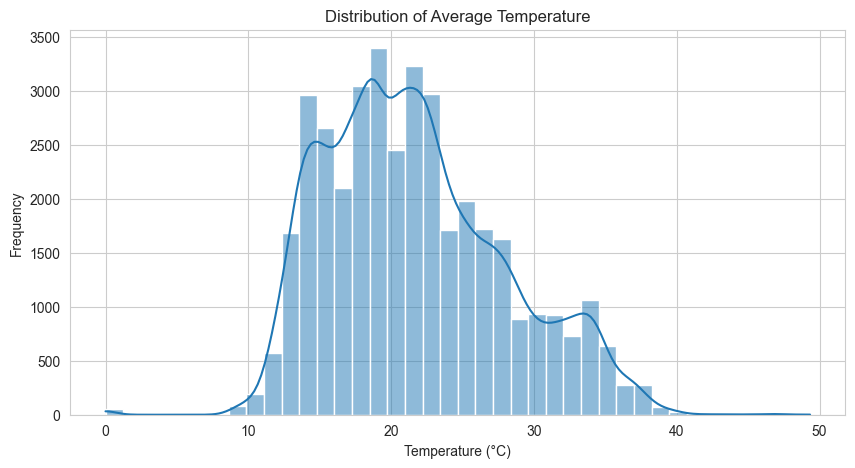

In [9]:
sns.histplot(df["Temp_Avg"], bins=40, kde=True)
plt.title("Distribution of Average Temperature")
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")
plt.show()

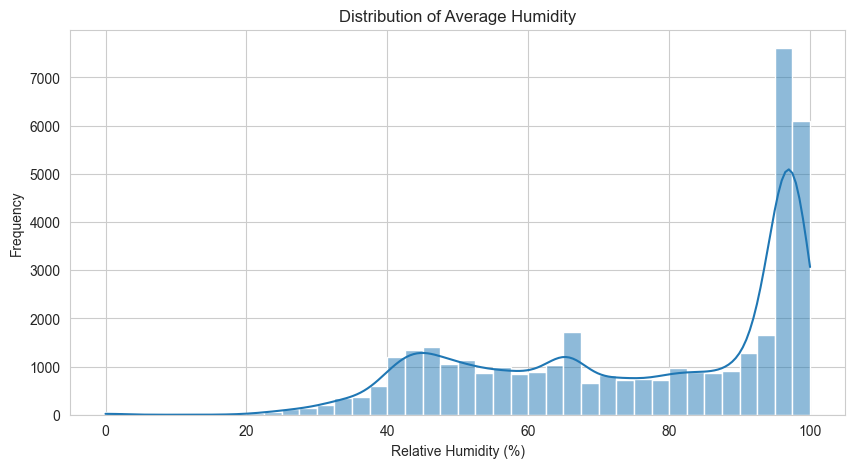

In [10]:
sns.histplot(df["Hum_Avg"], bins=40, kde=True)
plt.title("Distribution of Average Humidity")
plt.xlabel("Relative Humidity (%)")
plt.ylabel("Frequency")
plt.show()

In [19]:
df.set_index("Datetime", inplace=True)

hourly = df.resample("1H").mean(numeric_only=True)

KeyError: "None of ['Datetime'] are in the columns"

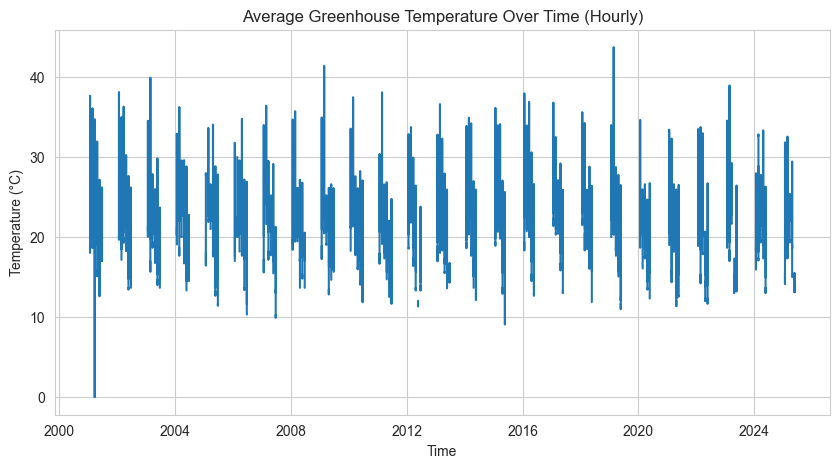

In [25]:
plt.plot(hourly.index, hourly["Temp_Avg"])
plt.title("Average Greenhouse Temperature Over Time (Hourly)")
plt.xlabel("Time")
plt.ylabel("Temperature (°C)")
plt.show()

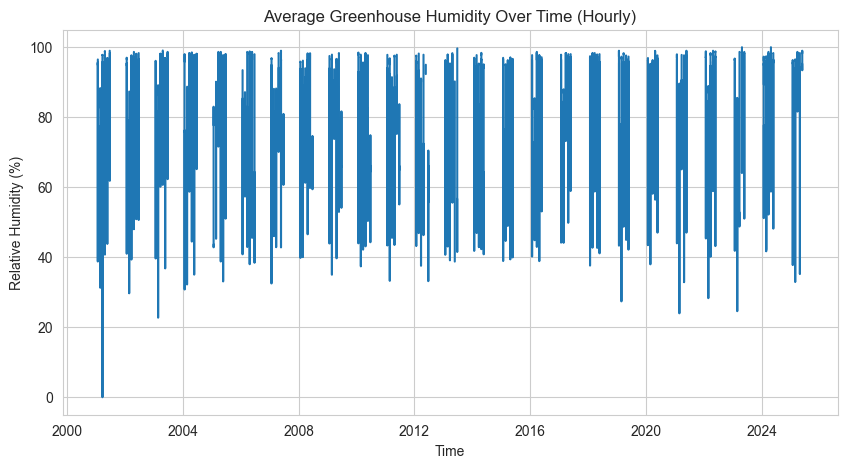

In [26]:
plt.plot(hourly.index, hourly["Hum_Avg"])
plt.title("Average Greenhouse Humidity Over Time (Hourly)")
plt.xlabel("Time")
plt.ylabel("Relative Humidity (%)")
plt.show()

[[ 1.    0.94  0.95 -0.44 -0.7  -0.76]
 [ 0.94  1.    0.97 -0.54 -0.77 -0.8 ]
 [ 0.95  0.97  1.   -0.54 -0.72 -0.78]
 [-0.44 -0.54 -0.54  1.    0.63  0.67]
 [-0.7  -0.77 -0.72  0.63  1.    0.87]
 [-0.76 -0.8  -0.78  0.67  0.87  1.  ]]


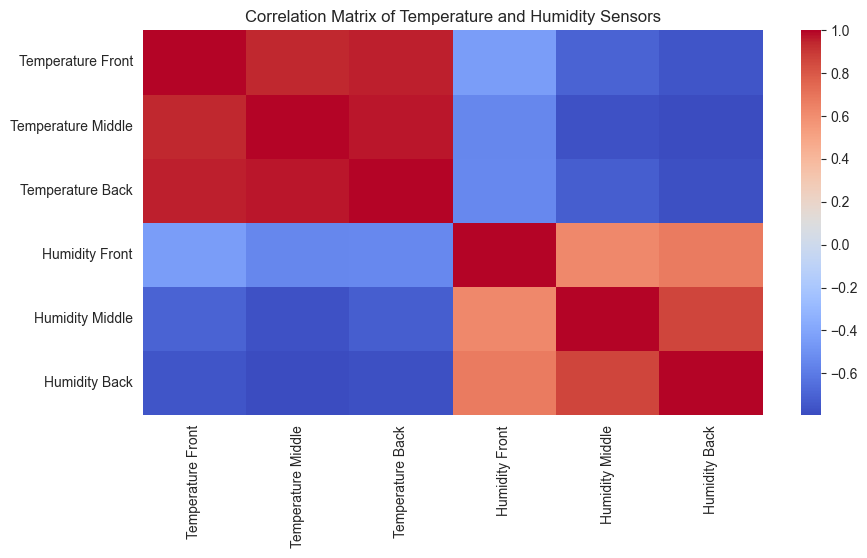

In [27]:
corr = hourly[[
    "Temperature Front", "Temperature Middle", "Temperature Back",
    "Humidity Front", "Humidity Middle", "Humidity Back"
]].corr()

print(np.round(corr.to_numpy(), 2))

sns.heatmap(corr, annot=False, cmap="coolwarm")
plt.title("Correlation Matrix of Temperature and Humidity Sensors")
plt.show()

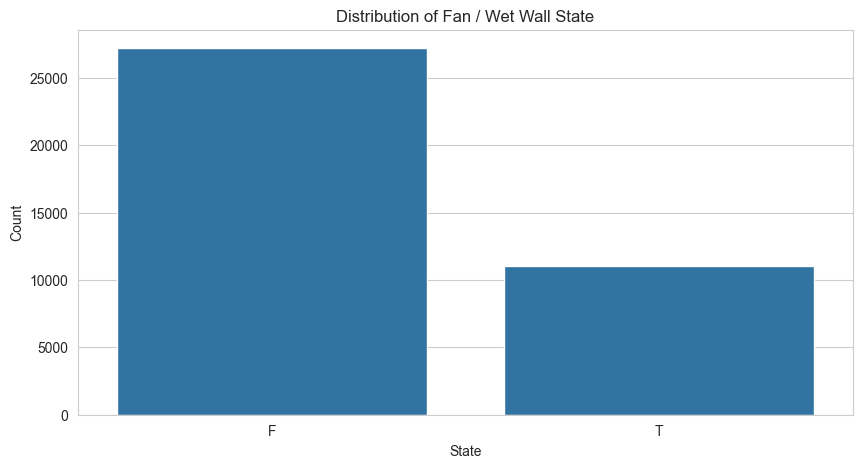

In [15]:
sns.countplot(x=df["Fan/Wet Wall State"])
plt.title("Distribution of Fan / Wet Wall State")
plt.xlabel("State")
plt.ylabel("Count")
plt.show()